<a href="https://colab.research.google.com/github/MoizAhmed2517/Football---Ball-Tracking-and-Analysis/blob/main/Yolov11_soccer_player_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO v11 - Soccer Player Detection

In [ ]:
!nvidia-smi

Fri Nov 29 12:04:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import os
HOME = os.getcwd()

## Setting Up dataset from roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


### Setting up API KEY

In [ ]:
from google.colab import userdata
api_key = userdata.get('roboflow')

### Downloading Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(12)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-12 in yolov11:: 100%|██████████| 756/756 [00:00<00:00, 2648.19it/s]


In [ ]:
dataset.location

'/content/datasets/football-players-detection-12'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo12n.pt data={dataset.location}/data.yaml batch=6 epochs=50 imgsz=1280 plots=True

/content
100% 5.35M/5.35M [00:00<00:00, 82.4MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/content/datasets/football-players-detection-12/data.yaml, epochs=50, time=None, patience=100, batch=6, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

In [ ]:
from IPython.display import Image

/content


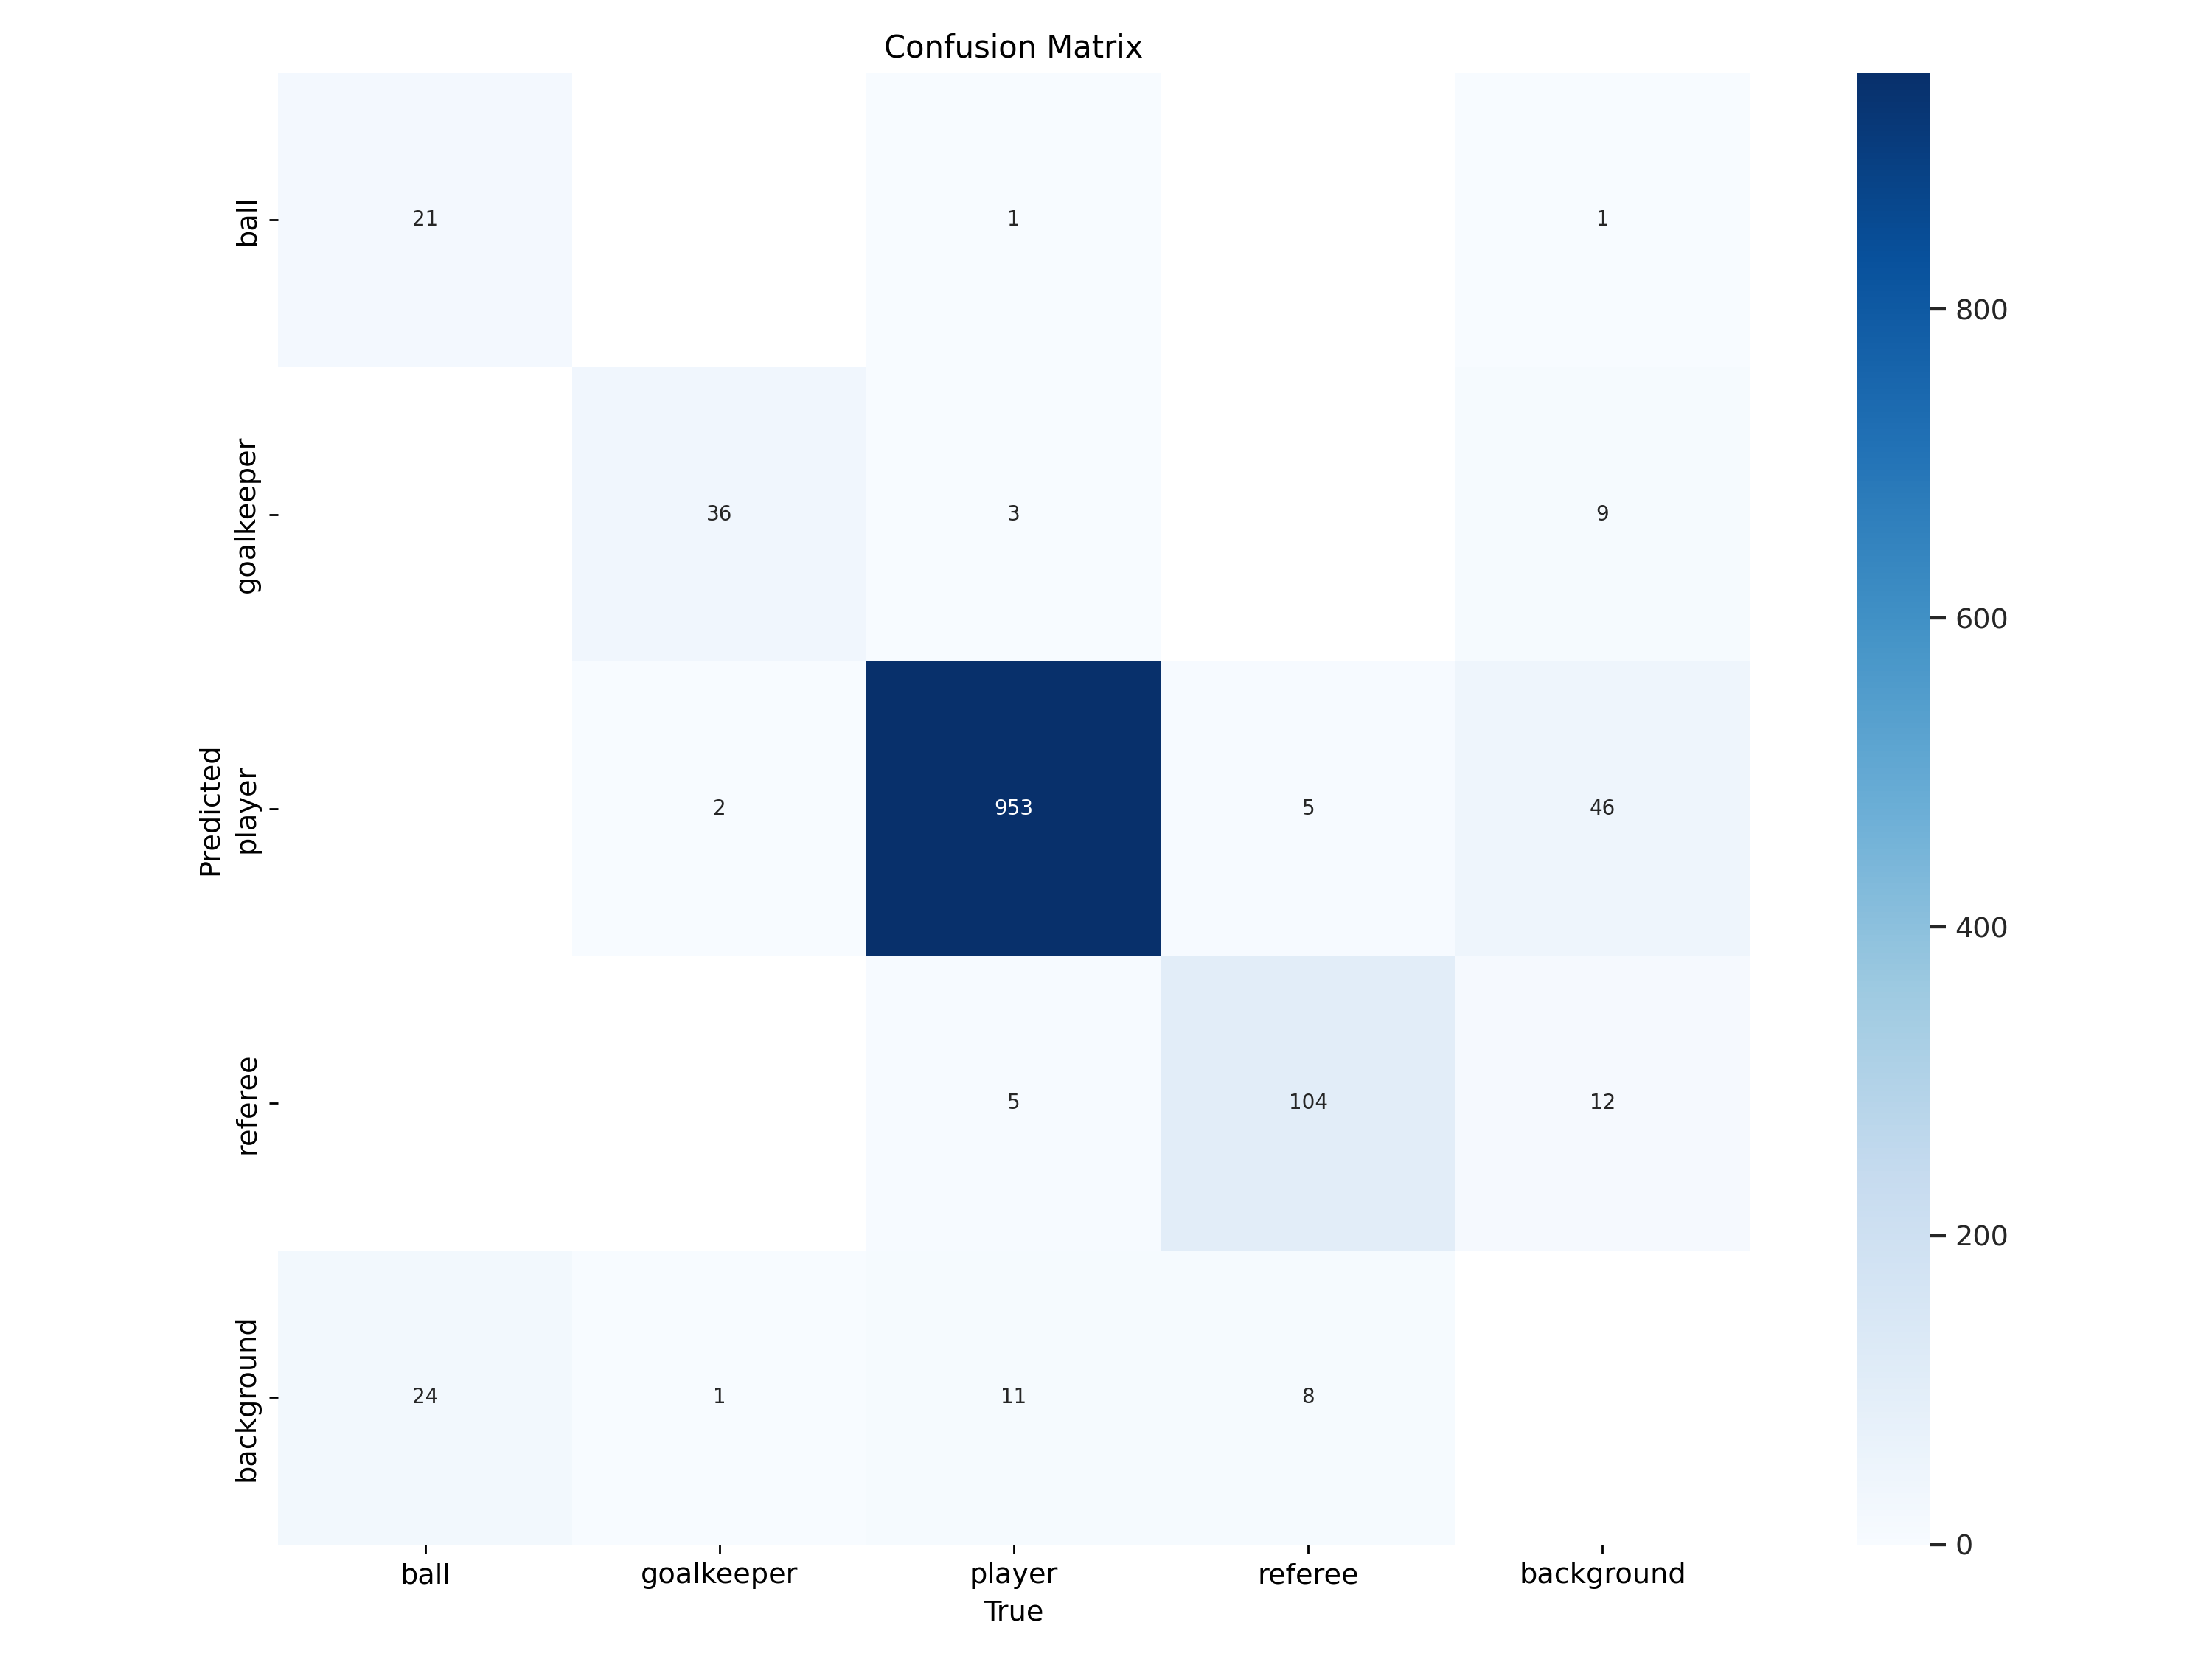

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


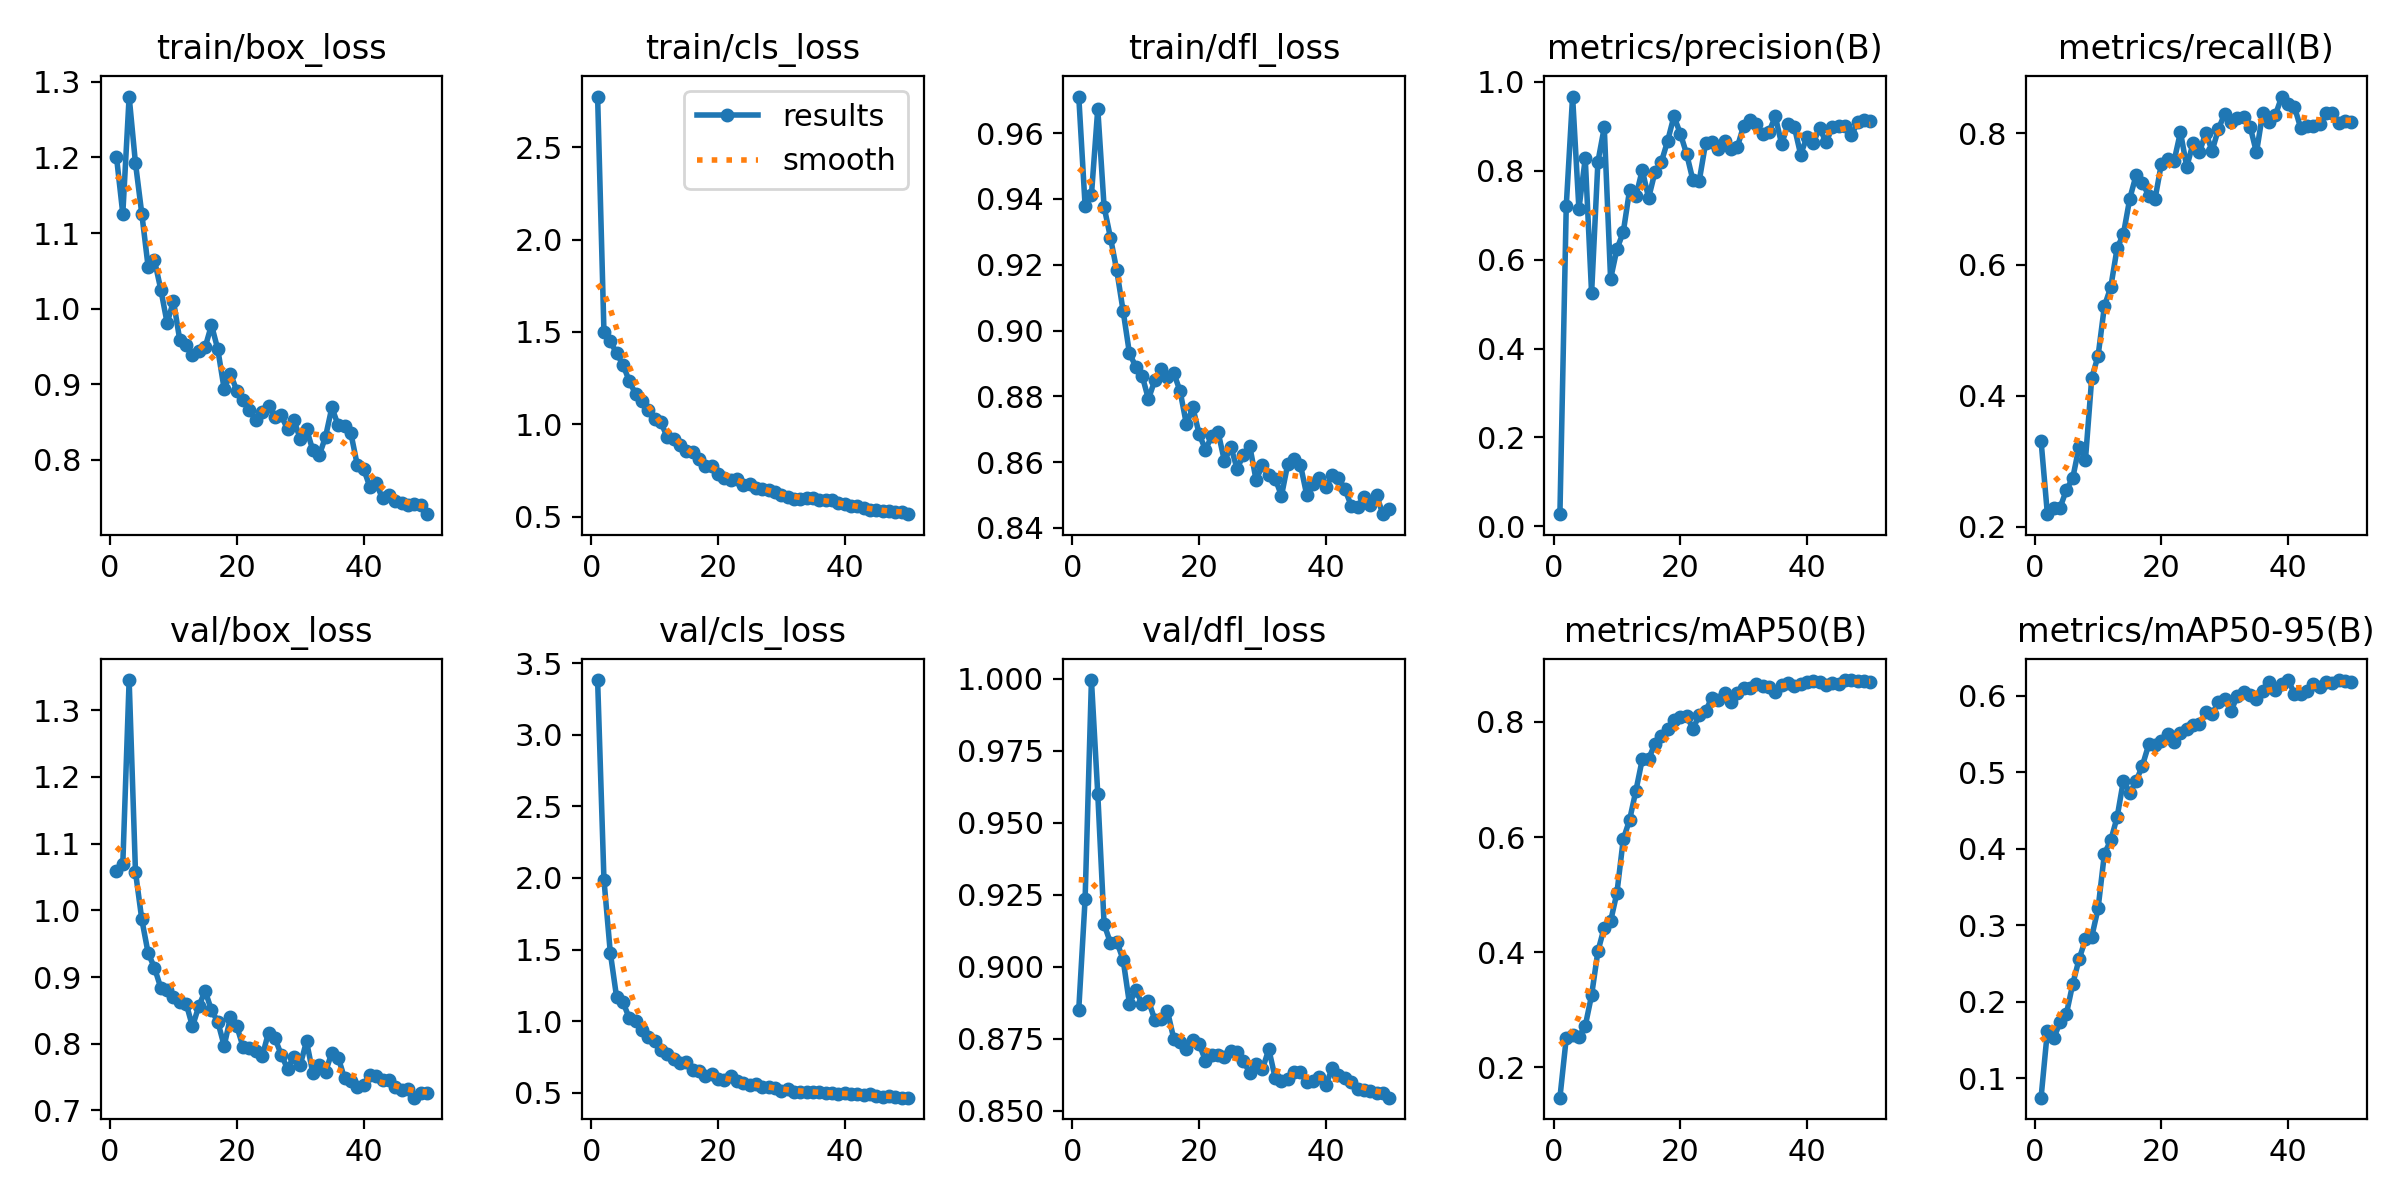

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


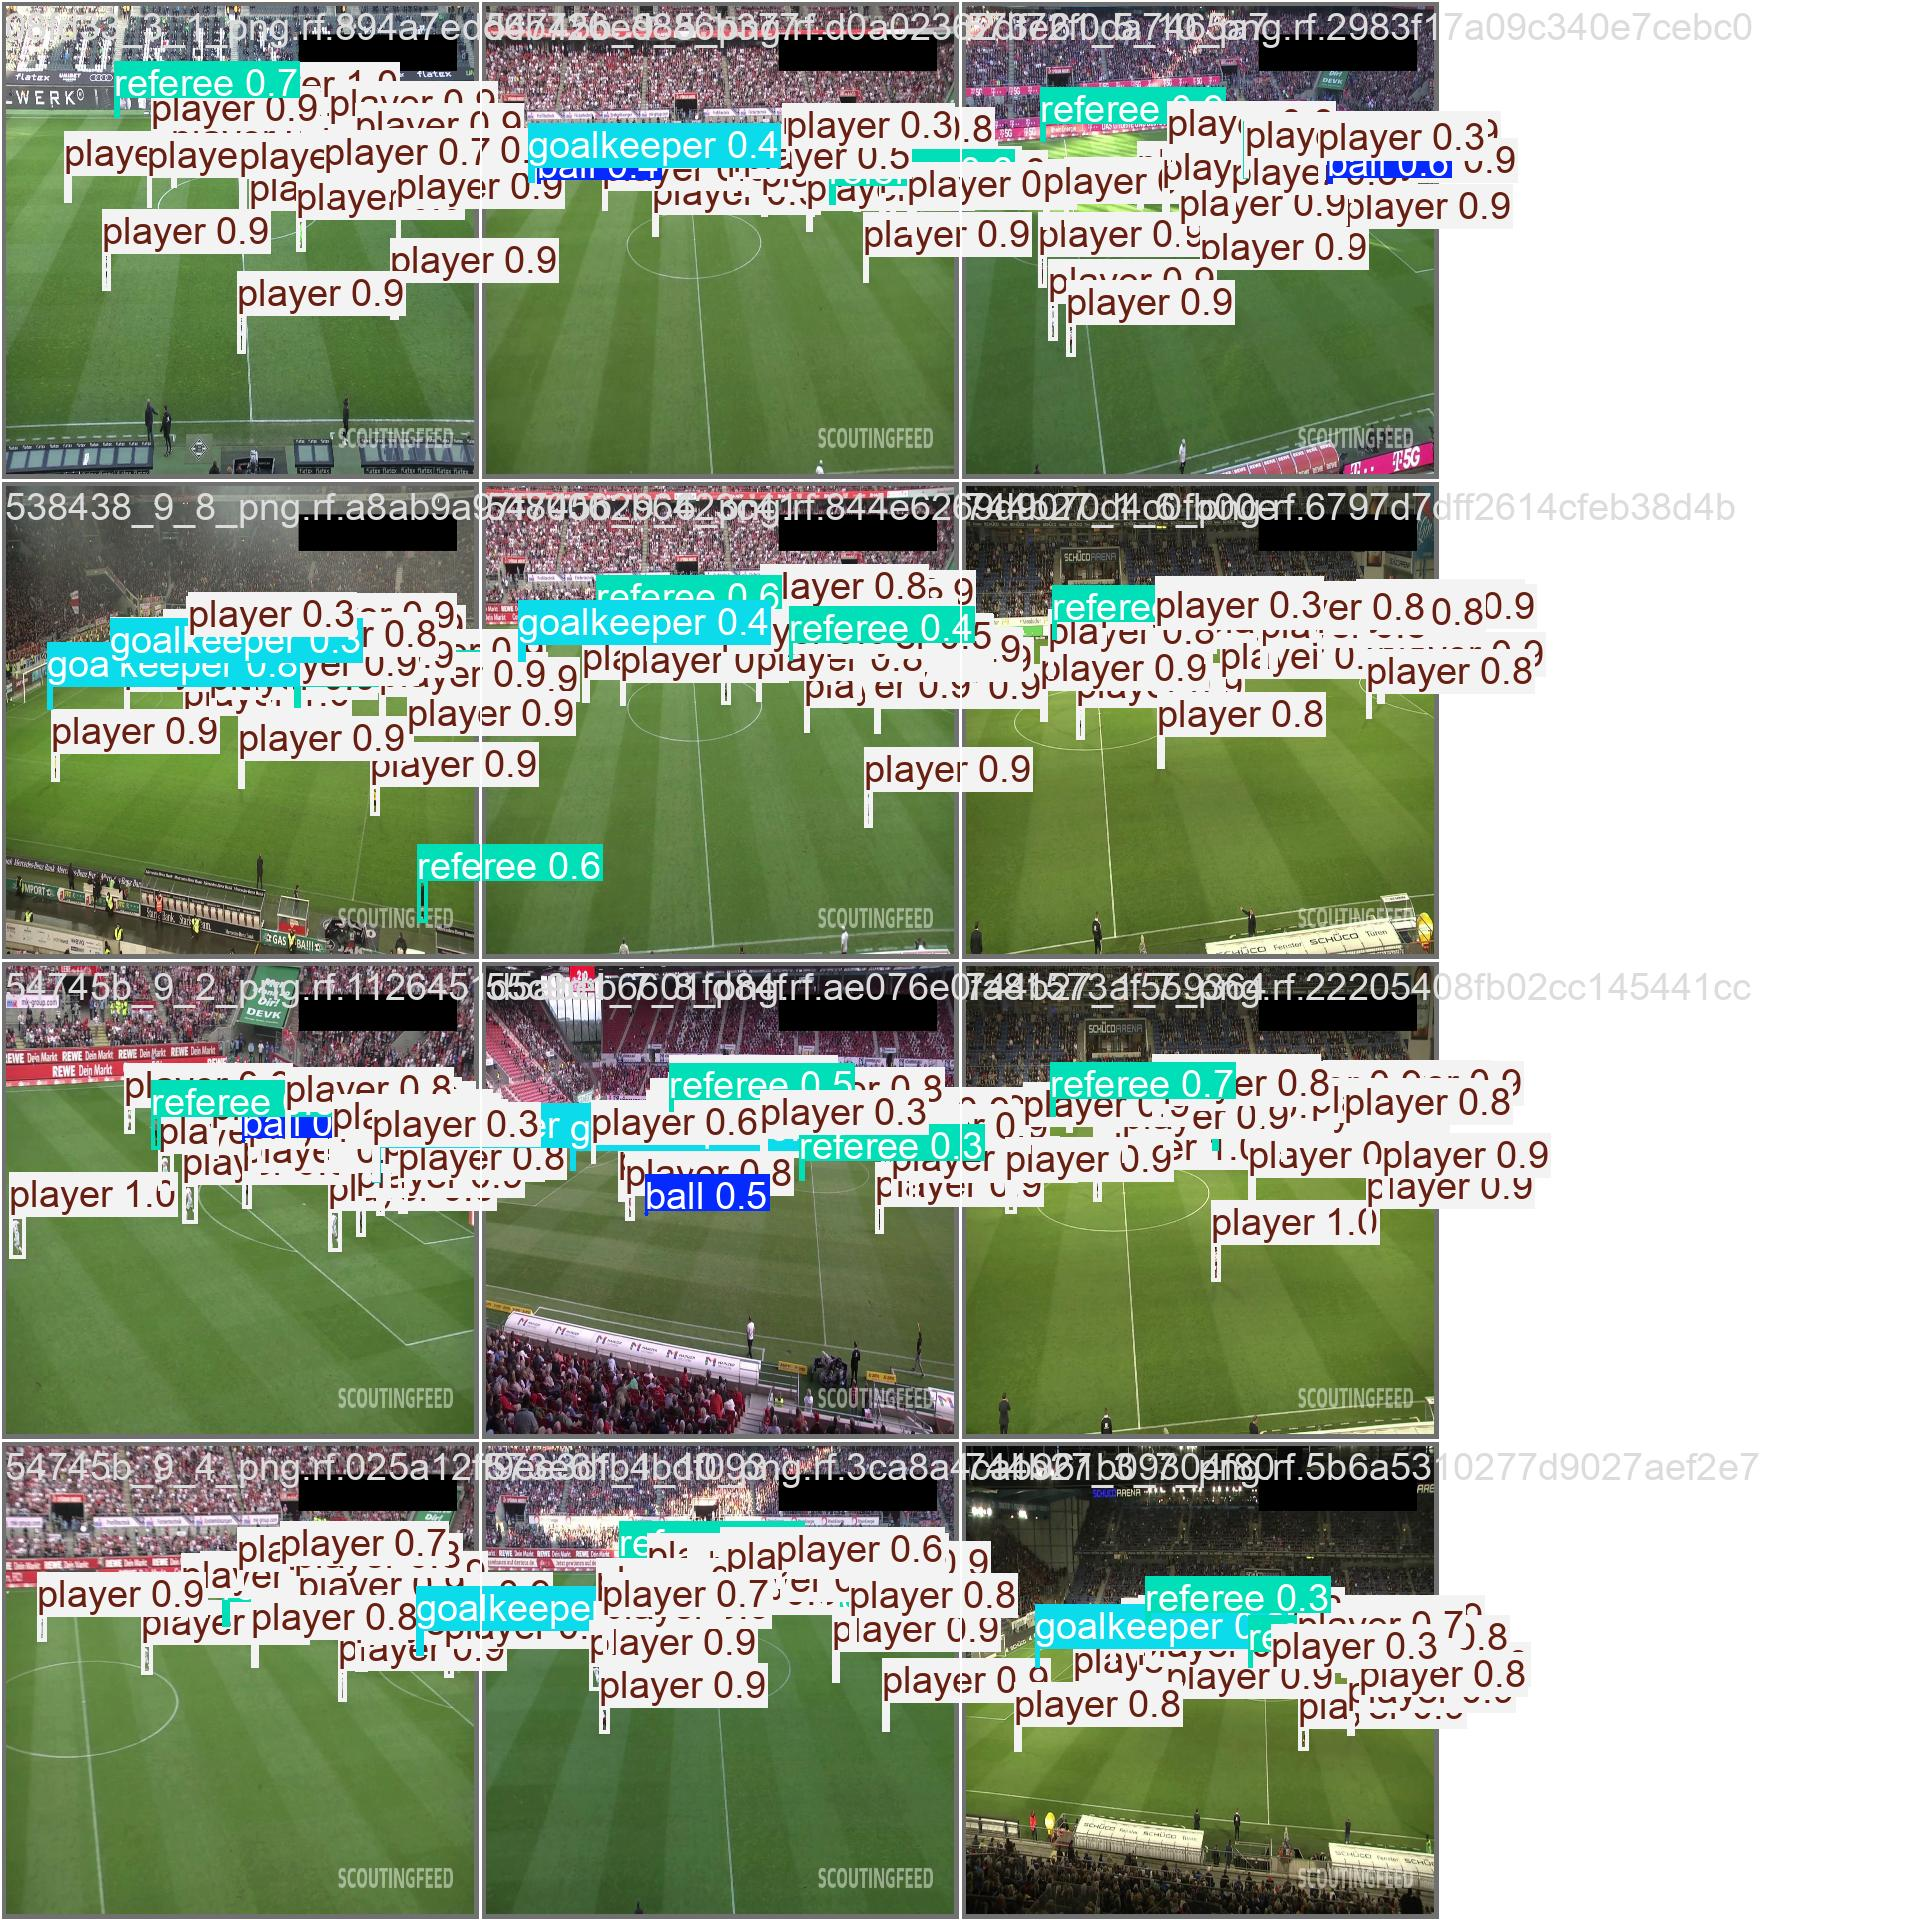

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo12n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/datasets/football-players-detection-12/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.43s/it]
                   all         49       1174       0.88      0.845      0.871      0.628
                  ball         45         45      0.917      0.489      0.581      0.284
            goalkeeper         38         39      0.784      0.974      0.956       0.73
                player         49        973      0.949      0.985      0.993      0.818
               referee         49        117       0.87      0.932      0.955      0.681
Speed: 37.0ms preprocess, 19.1ms inference, 0.0ms loss, 14.3ms postprocess per image
Results saved to runs/d

## Uploading weights to roboflow for utilizing in longer terms

In [ ]:
project = rf.workspace().project("football-ai-analytics-cn73h")
version = project.version(1)
version.deploy("yolov11", f"{HOME}/runs/detect/train/weights/", "best.pt")

loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
